In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [25]:
advert = pd.read_csv("Advertising.csv")
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [29]:
advert.drop("Unnamed: 0",axis=1,inplace=True)

In [30]:
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
advert.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

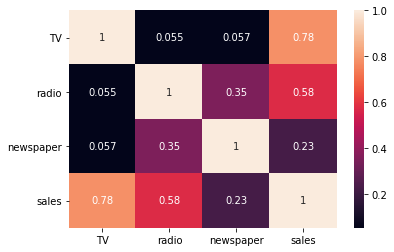

In [38]:
sns.heatmap(advert.corr(),annot=True)

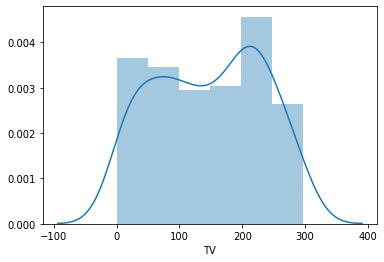

In [39]:
sns.distplot(advert.TV)

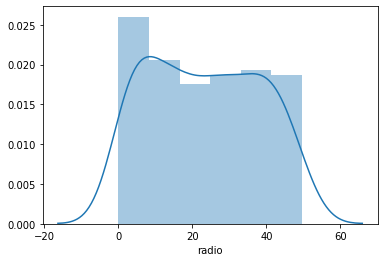

In [40]:
sns.distplot(advert.radio)

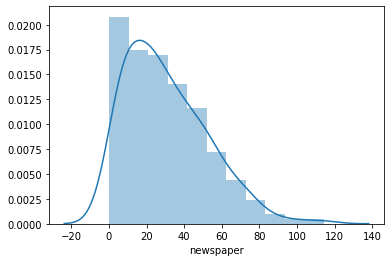

In [41]:
sns.distplot(advert.newspaper)

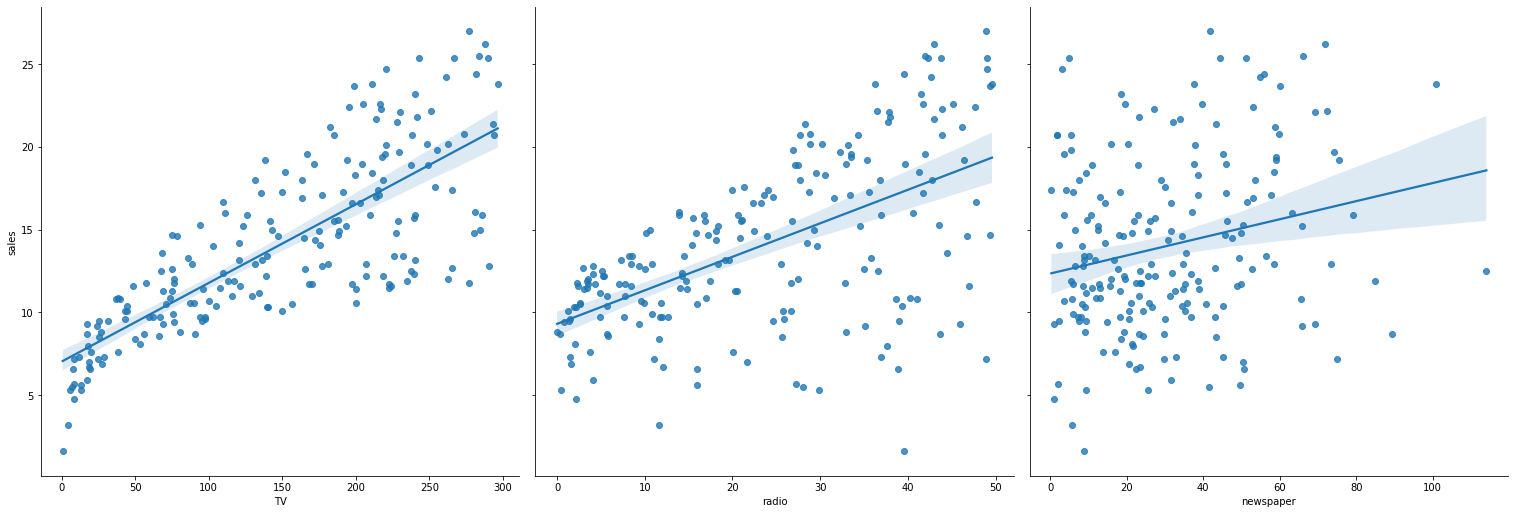

In [43]:
sns.pairplot(advert,x_vars=["TV","radio","newspaper"],y_vars="sales",height=7,kind="reg")

In [51]:
x = advert[["TV"]]

In [52]:
type(x)

pandas.core.frame.DataFrame

In [53]:
y = advert.sales

In [54]:
type(y)

pandas.core.series.Series

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,random_state=1)

In [58]:
reg = LinearRegression().fit(X_train,Y_train)
y_pred = reg.predict(X_test)


In [60]:
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [61]:
print("coefficient:",reg.coef_)
print("intercept:",reg.intercept_)

coefficient: [0.04802945]
intercept: 6.91197261886872


In [62]:
print("r2_score",np.sqrt(r2_score(Y_test,y_pred)))
print("MSE:",mean_squared_error(Y_test,y_pred))

r2_score 0.7477184349745465
MSE: 10.310069587813155


In [64]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

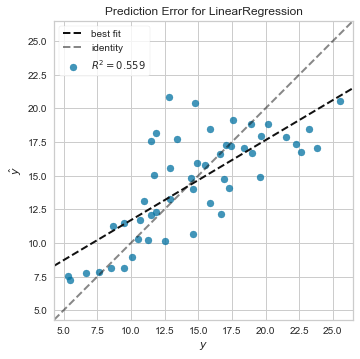

In [66]:
visualization = PredictionError(reg)
visualization.fit(X_train,Y_train)
visualization.score(X_test,Y_test)
visualization.poof()